# The Sparks Foundation - Data Science & Business Analytics - task1

## By Muhammed Musaddique

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Getting the data from the link
url = "http://bit.ly/w-data"

score_df = pd.read_csv(url)

In [10]:
score_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## **GOAL:** Predict the percentage of a student based on number of study hours

In [4]:
# Suggested solution is to use linear regression

In [5]:
# Let's see the data visually

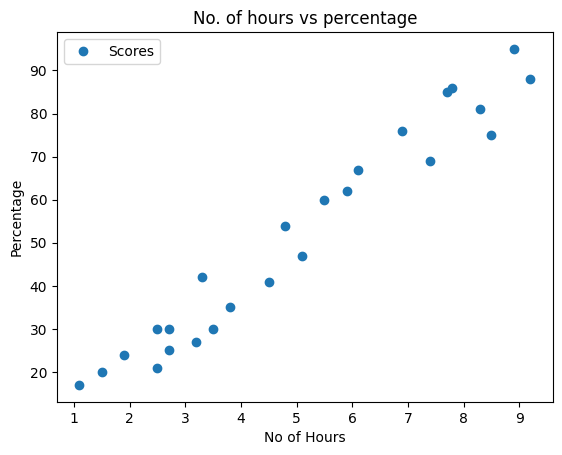

In [26]:
score_df.plot(x="Hours",y="Scores", style="o")
plt.title("No. of hours vs percentage")
plt.xlabel("No of Hours")
plt.ylabel("Percentage")
plt.show()

In [27]:
# This shows that percentage is super-linearly dependent on the no. of hours (Real-world scenarios may not be the same)

## Preparing the data for training

In [30]:
# To train a model, we first need two sets,
# 1. Features - input variables
# 2. Labels - target variables

In [32]:
score_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [33]:
score_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [60]:
X_hours = score_df.iloc[:, :-1].values
y_scores = score_df.iloc[:,1].values

In [67]:
X_hours.shape # Our input variables (Features)

(25, 1)

In [68]:
y_scores.shape # Our target variables (Labels)

(25,)

In [63]:
# Now with such data, we can train our model

In [64]:
# But wait! We need to create a test set to check our model

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_hours, y_scores, test_size=0.2, random_state=42)

In [72]:
X_train.shape

(20, 1)

In [73]:
y_train.shape

(20,)

## Training the model

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lin_reg = LinearRegression()

In [74]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [75]:
# Our model is trained!

In [83]:
y_train_pred = lin_reg.predict(X_train)

In [76]:
# Let's evaluate the model

In [84]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_train_pred)

In [85]:
rmse = np.sqrt(mse)

In [86]:
rmse

5.608461065868858

## Using on test data 

In [87]:
y_test_pred = lin_reg.predict(X_test)

In [88]:
test_mse = mean_squared_error(y_test, y_test_pred)

In [90]:
test_rmse = np.sqrt(test_mse)

In [91]:
test_rmse

4.352380006653288

In [92]:
#Looks better

## Seeing the line formed by linear regressor

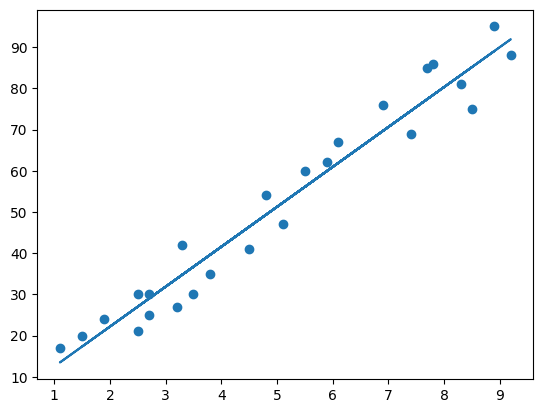

In [94]:
# Plotting the regression line
line = lin_reg.coef_*X_hours+lin_reg.intercept_

# Plotting for the test data
plt.scatter(X_hours, y_scores)
plt.plot(X_hours, line);
plt.show()

In [95]:
# Comparing the predicted values with actual ones

In [109]:
test_comp_df = pd.DataFrame({"No of Hours": X_test.reshape(-1), "True_scores": y_test, "Predicted_scores": y_test_pred})

In [110]:
test_comp_df

,No of Hours,True_scores,Predicted_scores
0,8.3,81,83.188141
1,2.5,30,27.032088
2,2.5,21,27.032088
3,6.9,76,69.633232
4,5.9,62,59.951153


In [99]:
# That's pretty close!

## Let's try on our custom data

In [130]:
# Let's say ujwal studied for 7 hours for his test. Then let's predict his score
ujwal_hours = 7
ujwal_pred = lin_reg.predict([[ujwal_hours]])
print(f"Ujwal would probably get: {ujwal_pred[0]}%")

Ujwal would probably get: 70.60143943508962%


In [115]:
# But what if he studied for about 10 hours!

In [127]:
ujwal_high_hours = 10.2
ujwal_high_pred = lin_reg.predict([[ujwal_high_hours]])
print(f"According to the model, Ujwal would probably get: {ujwal_high_pred[0]}%")

According to the model, Ujwal would probably get: 101.58408952934784%


In [118]:
# What!?

In [119]:
# Perhaps we need to cap the predicted values

In [120]:
# Let's create a function for usability

In [128]:
def lin_reg_predict(input_val):
    max_val = 100.00
    pred = lin_reg.predict(input_val)
    if pred[0] > max_val:
        return max_val
    return pred[0]

In [122]:
# Again let's repeat the previous prediction

In [125]:
ujwal_high_hours = 10.2
ujwal_high_pred = lin_reg_predict([[ujwal_high_hours]])
print(f"According to the model, Ujwal would probably get: {ujwal_high_pred[0]}%")

According to the model, Ujwal would probably get: 100.0%


### Congrats Ujwal!